# 04-02. 확률적 경사 하강법

데이터가 한번에 주어지지 않고 지속적으로 추가된다면,   
- 기존의 데이터에 새로운 데이터를 추가하여 매번 다시 훈련   
→ 시간이 지날수록 데이터의 양도 늘어 저장공간 비용과 훈련 시간이 증가
- 데이터를 추가할 때 이전 데이터를 조금씩 버리는 방식   
→ 데이터의 크기를 일정하게 유지할 수 있지만 중요한 데이터가 손실될 수 있음

## 점진적 학습
- 앞서 훈련한 모델을 버리지 읺고 새로운 데이터에 대해서만 추가로 더 학습하는 방식
- 대표적인 점진적 학습 알고리즘으로 확률적 경사 하강법이 있음

## 손실 함수(loss function)
- 모델의 출력값과 사용자가 원하는 출력값 간의 오차를 의미
- 가중치(=계수)의 값을 아주 조금 변화시켰을 때 손실이 어떻게 변화하는지 나타나야 함. 즉, 미분 가능해야함
- 오차가 낮을수록(함수값이 작을수록) 더 좋은 모델
- 분류 문제에 있어 손실은 정답을 맞히지 못하는 것

정답을 맞힌 개수(=정확도)를 손실 함수로 사용할 수 있을까?
- 샘플의 개수가 적다면 표현 가능한 정확도는 한정적이다.
 - ex. 4개의 샘플로 표현 가능한 정확도는 '0, 0.25, 0.5, 0.75, 1' 5개 뿐   
 → 연속적이지 않은 계단형 함수로 대부분의 위치에서 기울기가 0이 되어 손실이 최소가 되는 지점을 판단할 수 없다.

## 로지스틱 손실 함수(logistic loss function)
- 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)라고도 부른다.
- 연속적인 손실 함수로 사용 시 로지스틱 회귀 모델이 만들어진다.
- 양성 클래스의 예측 확률은 타깃인 1과 곱한 후 음수로 바꾸어 함수값을 나타내고, 음성 클래스의 예측 확률은 '1 - 예측값', 타깃은 1로 바꾼 뒤 위와 동일하게 계산한다.
- 양성 클래스일 때 손실: 예측 확률 x 1
 - ex. 예측 확률이 0.9일 때 1 x 0.9 = 0.9
- 음성 클래스일 때 손실: (1 - 예측확률) x 1
 - ex. 예측 확률이 0.8일 때 1 x (1 - 0.8) = 0.2
 - 0이 아닌 1을 곱하는 이유: 1 - 예측 확률을 통해 양성 클래스에 대한 확률로 변환하였기 때문. 음성 클래스(0)에 대한 값을 구할 경우 0이 곱해져 제대로된 값을 구할 수 없다.
 - ex. 양성 클래스에 대한 예측값이 0.9일 경우 1 x 0.9를 음수로 바꾼 -0.9가
- 예시에서 -0.9는 최소값인 -1에 가까운 낮은 손실, -0.2는 최대값인 0에 가까운 높은 손실이다.

### 손실 함수와 로그 함수
- 로그 함수는 0 ~ 1 사이에서 음수값을 가지며, 0에 가까울수록 매우 큰 음수값을 가진다.
- 예측 확률에 로그 함수를 적용하면 예측 확률이 0에 가까울수록 매우 큰 손실을 만들어 모델의 손실 회피에 큰 영향을 미칠 수 있기 때문에 로지스틱 손실 함수에서는 로그 함수를 사용한다.
- 양성 클래스일 때 손실: -log(예측확률)
- 음성 클래스일 때 손실: -log(1 - 예측확률)

### 국소 최소값과 전역 최소값
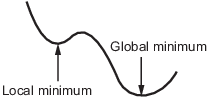
- 국소 최소값(local minimum): 주변 함수값들에 대해서는 최소값이지만 더 멀리 있는 함수값에 대해서는 더 클수도 있는 함수값
- 전역 최소값(Global minimum): 다른 모든 함수값들에 대해서 최소인 값

## 경사 하강법
- 작동 방식:   
1) 한번의 반복마다 임의의 매개변수값(가중치)를 설정하고 해당 값을 바탕으로 최소값과 손실 함수의 기울기를 구한다.   
2) 기울기가 더 작아지는 방향으로 매개변수를 조정한다. (기울기가 커졌다면 반대방향으로, 기울기가 작아졌다면 정방향으로 이동)   
3) 최종적으로 기울기가 최소가 되는 지점을 찾는 것을 목표로 한다.
- 배치 크기(batch size): 한번의 연산에 들어가는 데이터의 크기. 크기가 커질수록 시간이 오래걸리고 컴퓨터 자원을 많이 사용하며, 너무 작을경우 훈련이 불안정해질 수 있다.
- 에포크(epoch): 하나의 데이터 세트를 전부 사용하는 과정



### 확률적 경사 하강법(Stochastic Gradient Descent)
- 배치 크기를 1로 하는 경사 하강법
- 무작위로 나오는 1개의 샘플에 대해서만 기울기를 계산
- 하나의 샘플에 대한 연산을 수행하기에 학습속도가 빠르고 메모리 소모가 적음
- 무작위로 추출된 샘플에 대한 경사를 구하기 때문에 조정값이 불안정할 수 있음

### 배치 경사 하강법(batch gradient descent)
- 배치 크기를 전체 데이터셋으로 하는 경사 하강법
- 모든 데이터셋에 대해 연산을 수행하기에 가장 안정적으로 최소값에 수렴
- 배치의 크기가 매우 크기 때문에 수행 시간이 길고 컴퓨터 자원이 많이 소모됨
- 안정적으로 움직이기 때문에 지역 최소값에 빠져 전역 최소값을 찾지 못할 가능성이 있음

### 미니배치 경사 하강법(Minibatch gradient descent)
- 전체 데이터셋을 일정한 크기의 미니배치로 나누어서 연산을 수행하는 경사 하강법
- 확률적 경사 하강법과 배치 경사 하강법의 장점만을 이용하는 방법으로 실전에서 가장 많이 사용됨

### SGDClassifier(사이킷런의 확률적 경사 하강법)

In [1]:
# 데이터프레임 생성

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 데이터 세트 분할

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 표준화 전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [2]:
# SGDClassifier 객체 생성 및 훈련

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)  # loss: 손실 함수의 종류, max_iter: 수행할 에포크 횟수 // loss에 'log' 대신 'log_loss' 사용해야함
sc.fit(train_scaled, train_target)  # 전체 데이터를 입력하지만 알고리즘 상에서 샘플을 하나씩 꺼내 학습하므로 배치 경사 하강법이 아닌 확률적 경사 하강법
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


두 세트의 정확도가 낮고 모델이 충분히 수렴하지 않았다는 경고인 ConvergenceWarning이 출력   
반복횟수를 늘리면 대부분 해결되지만 일단 책과 동일하게 10번만 반복

In [3]:
# 정확도를 올리기 위한 추가 훈련(점진적 학습)
# partial_fit()을 사용하면 1 에포크씩 추가로 훈련할 수 있다.

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


#### 에포크와 과대/과소적합
- 학률적 경사 하강법을 이용하는 모델은 에포크 횟수에 따라 과대/과소적합이 발생
 - 에포크가 너무 적으면 훈련 세트를 덜 학습하는 과소적합이 발생
 - 에포크가 너무 많으면 훈련 세트를 너무 학습하는 과대적합이 발생
- 테스트 세트의 점수가 증가하다가 감소하기 시작하는 순간이 과대적합 시작 시점
 - 조기 종료(early stopping): 과대적합이 시작하기 전에 훈련을 멈추는 것

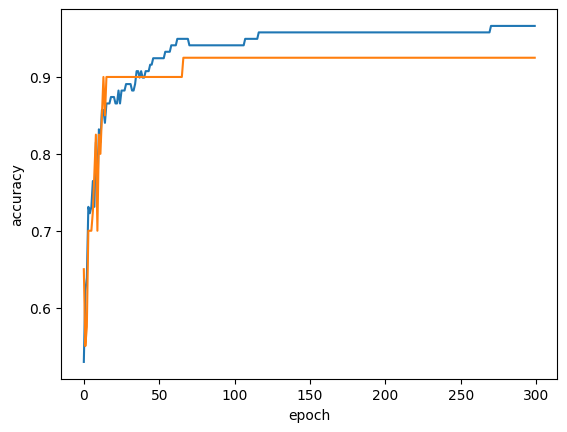

In [4]:
# 에포크에 따른 과대/과소적합 그래프 생성

import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []

# fit() 없이 partial_fit()만 사용하기 위해서는 훈련 세트의 전체 클래스 레이블을 classes 매개변수에 전달해야함
classes = np.unique(train_target)  # 훈련 세트의 전체 클래스 레이블 추출

for _ in range(0, 300):  # 에포크 300번 반복
  sc.partial_fit(train_scaled, train_target, classes=classes)  # clases 매개변수에 레이블 전달
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 300번의 에포크 중 각 세트의 점수 변화를 그래프로 표시

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크 초기에는 두 세트의 점수가 낮은 과소적합이, 100번째 에포크 이후로는 과대적합이 발생   
100 에포크가 적절한 반복 횟수

In [5]:
# 반복 횟수를 100으로 설정하고 모델을 다시 훈련

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)  # 에포크를 수핼할 때마다 줄어드는 loss 값이 tol모다 작아지면 자동으로 반복 종료. None으로 설정하면 전부 수행
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


#### 서포트 벡터 머신(support vector machine)
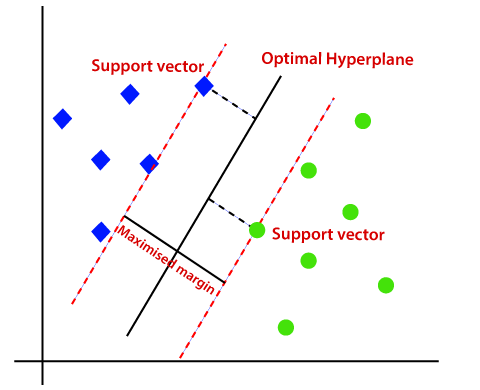
- n차원을 n-1차원으로 나눌 수 있는 초평면을 찾는 기법
- 각 데이터의 말단 간의 거리가 마진이며 마진을 최대화하는 것을 목표로 함

#### 힌지 손실(hinge loss)
- $$loss = max\{0, 1 -(y' \times y)\}$$
 - y': 모델의 예측값
 - y: 실제값
- 예측값이 실제값과 일치한다면 손실을 무시하고, 예측값이 실제와 다르다면 손실을 매우 크게 설정
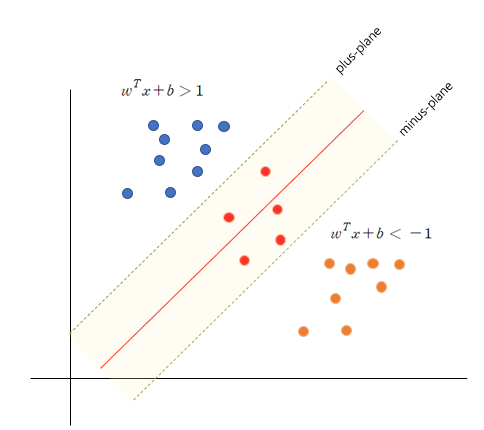
- 구별하기 쉬운 마진 외부값의 손실은 무시하고 마진 내부값에 대해서는 매우 높은 손실 부여

In [6]:
# 힌지 손실을 이용한 모델

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
